Sean Kelly
11/16/20
HW18

1.
---

In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector

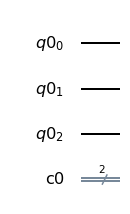

In [2]:
from qiskit import QuantumRegister, ClassicalRegister

#3 qubits in quantum register
qr = QuantumRegister(3)

#2 classical bits in classical register
cr = ClassicalRegister(2)

#Create circuit with 3 registers
circ = QuantumCircuit(qr, cr)

circ.draw('mpl')

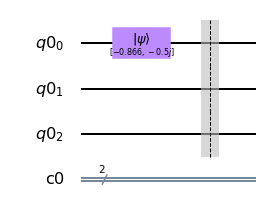

In [3]:
from numpy import sqrt

#Create specific single-qubit state [alpha, beta]
circ.initialize([-sqrt(0.75),-1j*sqrt(0.25)],qr[0])
#circ.initialize([-sqrt(0.75),sqrt(0.25)],qr[0])

circ.barrier()

circ.draw('mpl')

In [4]:
sim = Aer.get_backend('statevector_simulator')
res = execute(circ, sim).result().get_statevector()
print(res)

[-0.8660254+0.j   0.       -0.5j -0.       +0.j   0.       +0.j
 -0.       +0.j   0.       +0.j  -0.       +0.j   0.       +0.j ]


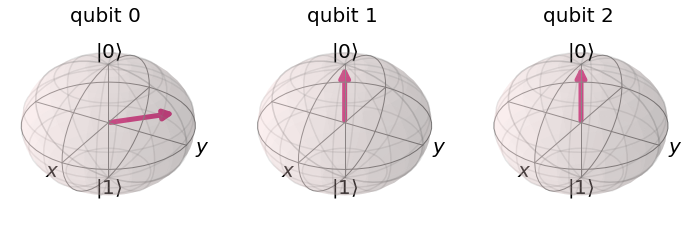

In [5]:
plot_bloch_multivector(res)

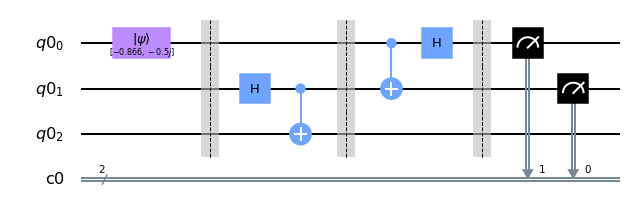

In [6]:
#first create bell pair
circ.h(1)
circ.cx(1,2)
circ.barrier()

#Now for quantum teleportation circuit
circ.cx(0,1)
circ.h(0)
circ.barrier()

#make measurement
#flip the order of classical bits because Qiskit places in reverse order
circ.measure(0,cr[1])
circ.measure(1,cr[0])

circ.draw('mpl')

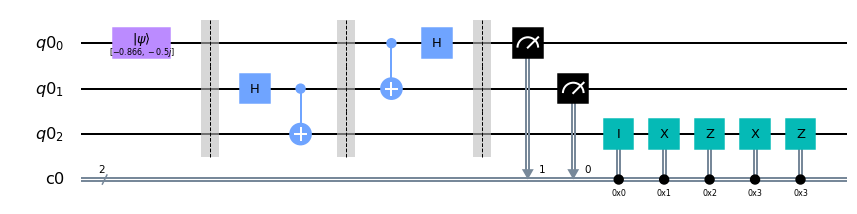

In [7]:
#control gates based on classical measurements

circ.i(qr[2]).c_if(cr,0) #00 in binary == 0 in decimal
circ.x(qr[2]).c_if(cr,1) #01 == 1
circ.z(qr[2]).c_if(cr,2) #10 == 2
circ.x(qr[2]).c_if(cr,3) #11 == 3
circ.z(qr[2]).c_if(cr,3)

circ.draw('mpl')

In [8]:
sim = Aer.get_backend('statevector_simulator')
res = execute(circ, sim).result().get_statevector()
print(res)

[ 0.00000000e+00+0.j   0.00000000e+00+0.j  -0.00000000e+00+0.j
 -8.66025404e-01+0.j   0.00000000e+00-0.j   0.00000000e+00-0.j
  0.00000000e+00+0.j  -6.12323400e-17-0.5j]


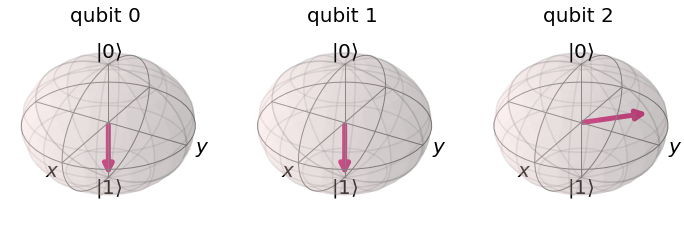

In [9]:
plot_bloch_multivector(res)

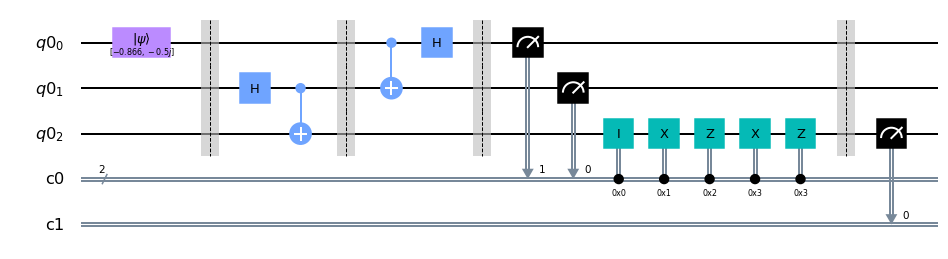

In [10]:
cr2 = ClassicalRegister(1)
circ.add_register(cr2)

circ.barrier()
circ.measure(2,cr2[0])
circ.draw('mpl')

2b.
---

In [11]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector

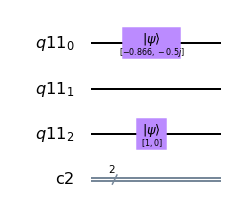

In [12]:
from qiskit import QuantumRegister, ClassicalRegister
from numpy import sqrt

qr = QuantumRegister(3) #3 qubits in quantum register
cr = ClassicalRegister(2) #1 classical bit in classical register
circ = QuantumCircuit(qr, cr) #Create circuit with 3 registers

#Create specific single-qubit state [alpha, beta]
circ.initialize([-sqrt(0.75),-1j*sqrt(0.25)],qr[0])

circ.initialize([1,0],qr[2]) #Initialize Bob's qubit to |0> state

circ.draw('mpl')

[-0.8660254+0.j   0.       -0.5j -0.       +0.j   0.       +0.j
 -0.       +0.j   0.       +0.j  -0.       +0.j   0.       +0.j ]


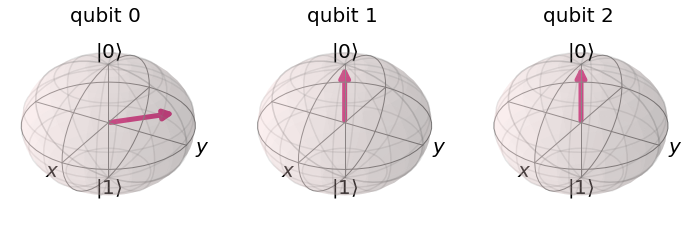

In [13]:
sim = Aer.get_backend('statevector_simulator')
res = execute(circ, sim).result().get_statevector()
print(res)

plot_bloch_multivector(res)

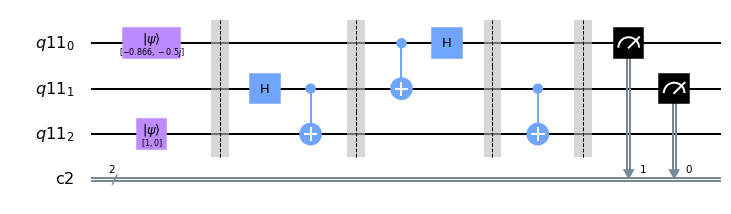

In [14]:
circ.barrier()
circ.h(1)
circ.cx(1,2)
circ.barrier()
circ.cx(0,1)
circ.h(0)
circ.barrier()
circ.cx(1,2)
circ.barrier()

#make measurement
#flip the order of classical bits because Qiskit places in reverse order
circ.measure(0,cr[1])
circ.measure(1,cr[0])

circ.draw('mpl')

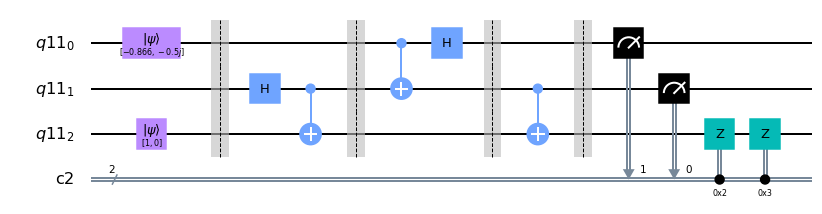

In [15]:
#make measurement
#flip the order of classical bits because Qiskit places in reverse order

circ.z(qr[2]).c_if(cr,2) #10 == 2
circ.z(qr[2]).c_if(cr,3) #11 == 3

circ.draw('mpl')

[-8.66025404e-01+0.j  -0.00000000e+00+0.j  -0.00000000e+00+0.j
 -0.00000000e+00+0.j  -6.12323400e-17-0.5j  0.00000000e+00+0.j
  0.00000000e+00+0.j   0.00000000e+00+0.j ]


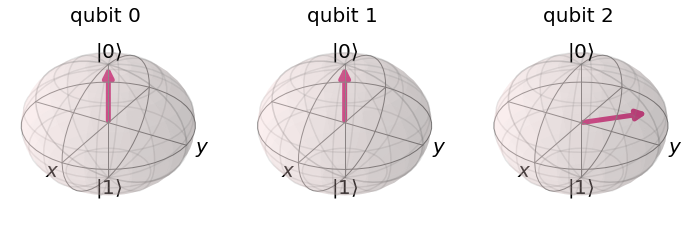

In [16]:
"""The initial state of qubit 0 was destroyed and intraported to qubit 2"""

sim = Aer.get_backend('statevector_simulator')
res = execute(circ, sim).result().get_statevector()
print(res)

plot_bloch_multivector(res)